In [8]:
##Imports
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
## This is to get the connection to the nba endpoints correctly (hot fix to work until they push changes)
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

In [136]:
from nba_api.stats.endpoints import playergamelog
## Lebron James
pgl = playergamelog.PlayerGameLog(player_id=2544, headers=headers)
gamelog = pgl.get_data_frames()[0]
gamelog.head()

SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP    WL  MIN  FGM  \
0     22019       2544  0021900390  DEC 15, 2019    LAL @ ATL  None   37   12   
1     22019       2544  0021900374  DEC 13, 2019    LAL @ MIA     W   37   11   
2     22019       2544  0021900358  DEC 11, 2019    LAL @ ORL     W   38   11   
3     22019       2544  0021900342  DEC 08, 2019  LAL vs. MIN     W   28   12   
4     22019       2544  0021900329  DEC 06, 2019    LAL @ POR     W   34   11   

   FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   20   0.600  ...    10   11    7    1    3    4   1   31           9   
1   22   0.500  ...     7    9   12    1    0    8   2   28           9   
2   24   0.458  ...     9   11   10    2    0    6   2   25           8   
3   20   0.600  ...     3    4   13    1    0    5   4   32          24   
4   23   0.478  ...     6    7    8    0    1    3   1   31          21   

   VIDEO_AVAILABLE  
0                0  
1                1  
2                1  
3                1  
4                1  

[5 rows x 27 columns]

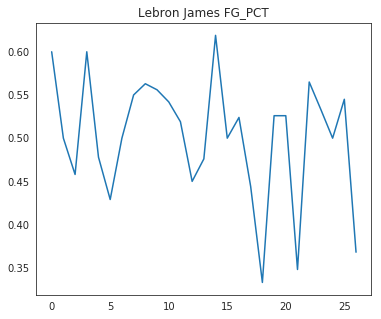

In [137]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(6,5))
plt.title('Lebron James FG_PCT')
plt.plot(range(gamelog.shape[0]), gamelog.FG_PCT)
plt.show()

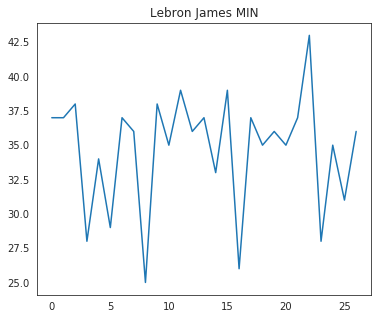

In [138]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(6,5))
plt.title('Lebron James MIN')
plt.plot(range(gamelog.shape[0]), gamelog.MIN)
plt.show()

In [139]:
### This is IDEA #2
### TODO: Experiment with different methods to get metrics
### TODO: Construct this as a class so we can call these methods on a player object DESIGN LOLOLOL :/

def determine_stats_win_index(player_game_data):  
    FG_PCT_THRESHOLD = 0.5
    
    stats_win_index = player_game_data.PTS + (2 * player_game_data.AST) 
    + (1.5 * player_game_data.REB) - 2 * (player_game_data.TOV + player_game_data.PF)
    + 2 * (player_game_data.STL + player_game_data.BLK)
    
    return stats_win_index

def plot_stats_to_winning(player_game_data, player_name):
    swi = determine_stats_win_index(player_game_data)
    plt.scatter(swi, player_game_data.PLUS_MINUS, s=300, c=player_game_data.FG_PCT)
    plt.title(player_name + ". His score is: " + str(determine_player_winning_score(player_game_data)))
    plt.show()

In [166]:
def determine_player_winning_score(player_game_data):
    swi = determine_stats_win_index(player_game_data)
    try:
        return np.round(np.mean(player_game_data.PLUS_MINUS.values * swi.values * player_game_data.MIN.values / 48),2)
    except ZeroDivisionError:
        return 0.01

def rank_player_winning_scores(team, efficiencies, n):
    top_n_players = sorted(efficiencies.keys(), reverse=True)
    print(top_n_players)
    print("Top " + str(n) + " players on the " + team)
    for i in range(n):
        print(str(i) + ". " + efficiencies[top_n_players[i]] + " has a stat win index score of: " + str(top_n_players[i]))

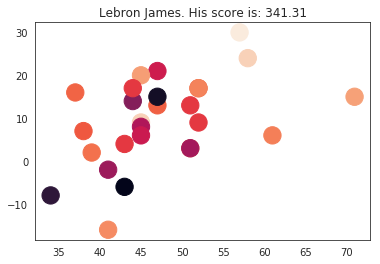

In [168]:
plot_stats_to_winning(gamelog, 'Lebron James')

In [169]:
## Build the team name to team_id map
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
list_teams = ['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL'
        , 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC'
        , 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']
i = 0
team_to_id = {}
for t in list_teams:
    team_to_id.update({t: nba_teams[i]['id']})
    i += 1
print(team_to_id)

{'ATL': 1610612737, 'BOS': 1610612738, 'CLE': 1610612739, 'NOP': 1610612740, 'CHI': 1610612741, 'DAL': 1610612742, 'DEN': 1610612743, 'GSW': 1610612744, 'HOU': 1610612745, 'LAC': 1610612746, 'LAL': 1610612747, 'MIA': 1610612748, 'MIL': 1610612749, 'MIN': 1610612750, 'BKN': 1610612751, 'NYK': 1610612752, 'ORL': 1610612753, 'IND': 1610612754, 'PHI': 1610612755, 'PHX': 1610612756, 'POR': 1610612757, 'SAC': 1610612758, 'SAS': 1610612759, 'OKC': 1610612760, 'TOR': 1610612761, 'UTA': 1610612762, 'MEM': 1610612763, 'WAS': 1610612764, 'DET': 1610612765, 'CHA': 1610612766}


In [181]:
# Make API Call for players across all seasons for a particular franchise
from nba_api.stats.endpoints import franchiseplayers

def get_winning_stats_per_team(team):
    fp = franchiseplayers.FranchisePlayers(team_id=team_to_id[team], headers=headers)
    PLAYERS = fp.get_data_frames()[0]
    # Build the list of players in the 2019-2020 season
    active_players = PLAYERS.loc[PLAYERS['ACTIVE_WITH_TEAM'] == 1]
    ids_per_team = active_players['PERSON_ID'].values
    player_names = active_players['PLAYER'].values
    print(player_names)
    players_per_team = dict(zip(ids_per_team, player_names))
    effectiveness = []
    players = []
    ## Get the winning_stats_for a player
    for player in players_per_team:
        pgl = playergamelog.PlayerGameLog(player_id=player, headers=headers)
        player_game_data = pgl.get_data_frames()[0]
        effectiveness.append(determine_player_winning_score(player_game_data))
        players.append(players_per_team[player])
        plot_stats_to_winning(player_game_data, players_per_team[player])
        
    effect = dict(zip(effectiveness, players)) 
    rank_player_winning_scores(team, effect, 5)

['LeBron James' 'Dwight Howard' 'Rajon Rondo' 'Jared Dudley'
 'JaVale McGee' 'Danny Green' 'Avery Bradley' 'Anthony Davis'
 'Kentavious Caldwell-Pope' 'Troy Daniels' 'Quinn Cook' 'Alex Caruso'
 'Kyle Kuzma' 'Kostas Antetokounmpo' 'Talen Horton-Tucker']


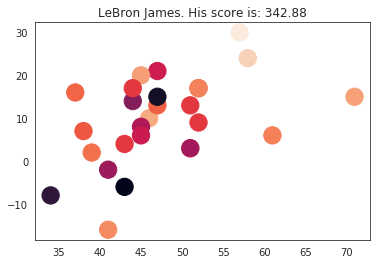

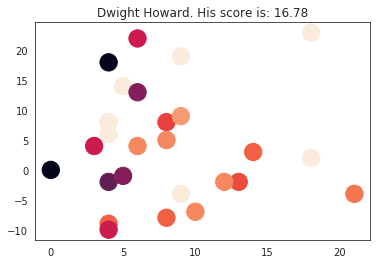

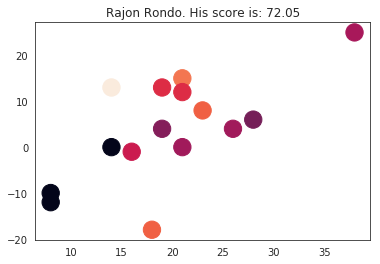

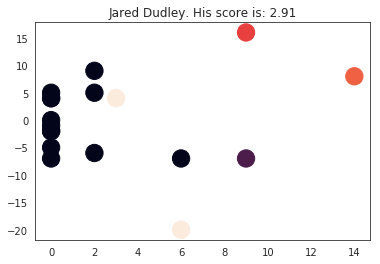

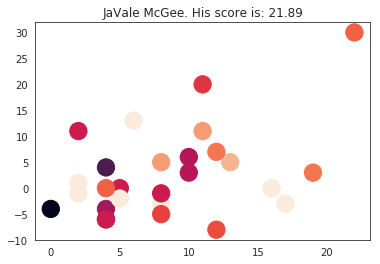

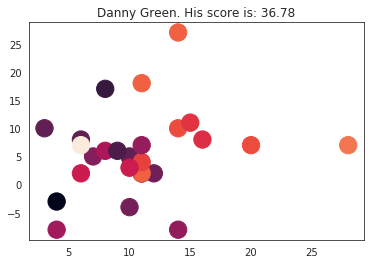

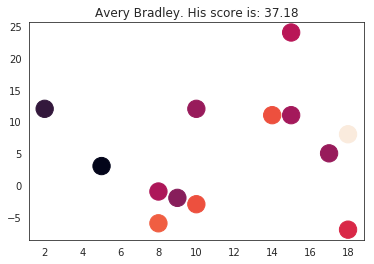

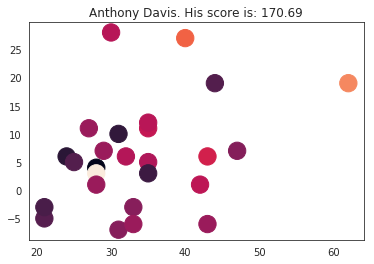

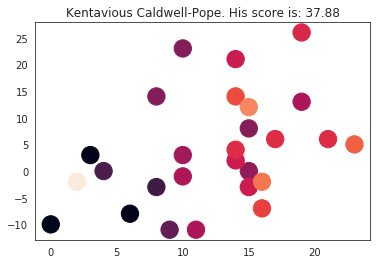

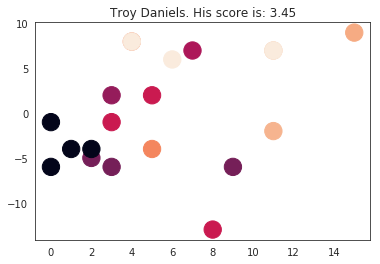

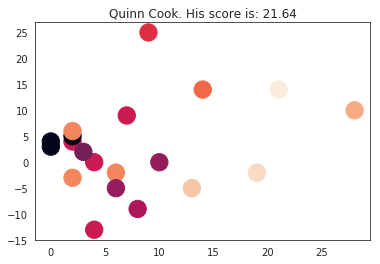

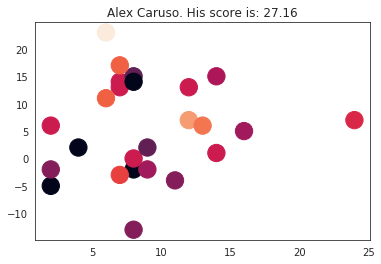

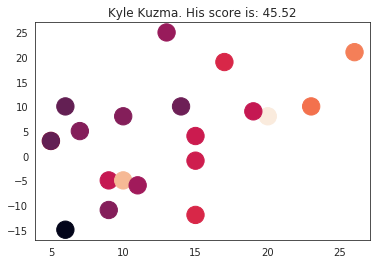

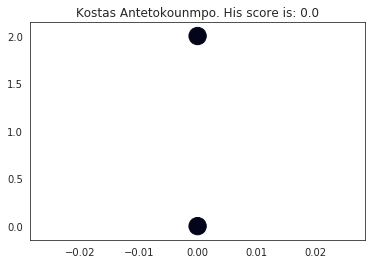

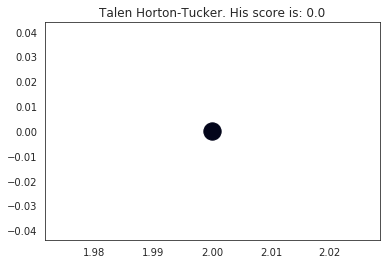

[342.88, 170.69, 72.05, 45.52, 37.88, 37.18, 36.78, 27.16, 21.89, 21.64, 16.78, 3.45, 2.91, 0.0]
Top 5 players on the LAL
0. LeBron James has a stat win index score of: 342.88
1. Anthony Davis has a stat win index score of: 170.69
2. Rajon Rondo has a stat win index score of: 72.05
3. Kyle Kuzma has a stat win index score of: 45.52
4. Kentavious Caldwell-Pope has a stat win index score of: 37.88


In [191]:
get_winning_stats_per_team("LAL")

['Udonis Haslem' 'Goran Dragic' 'James Johnson' 'Jimmy Butler'
 'Dion Waiters' 'Meyers Leonard' 'Kelly Olynyk' 'Justise Winslow'
 'Derrick Jones Jr.' 'Bam Adebayo' 'Duncan Robinson' 'Daryl Macon'
 'Kendrick Nunn' 'Tyler Herro' 'KZ Okpala' 'Chris Silva']


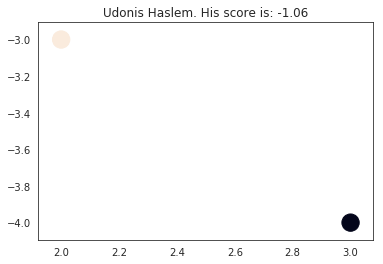

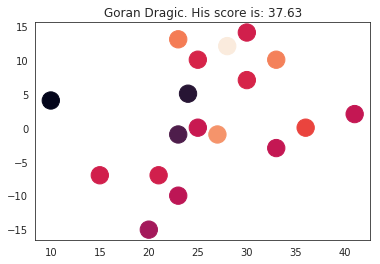

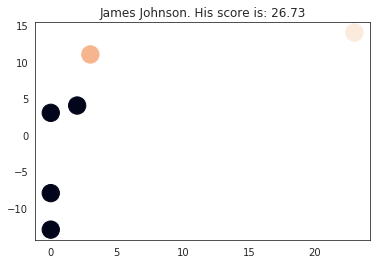

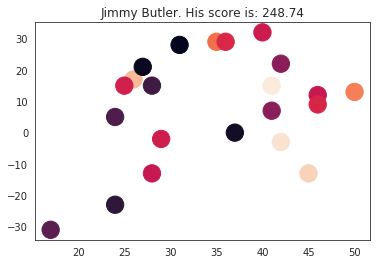

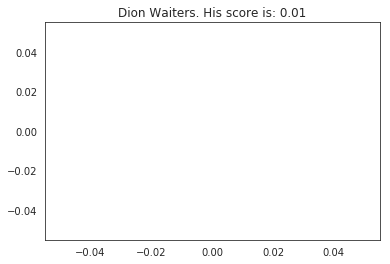

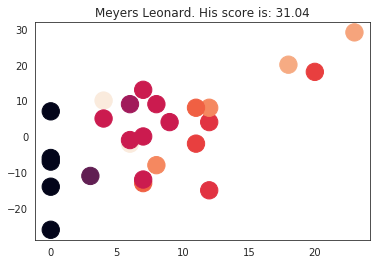

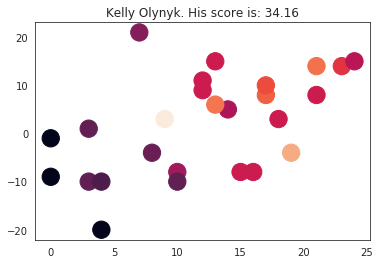

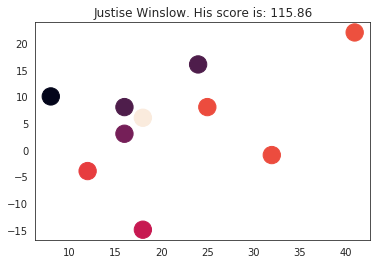

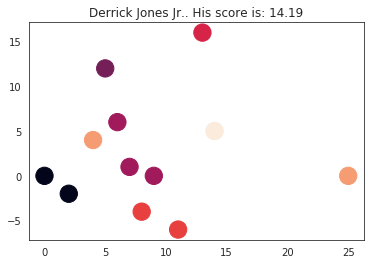

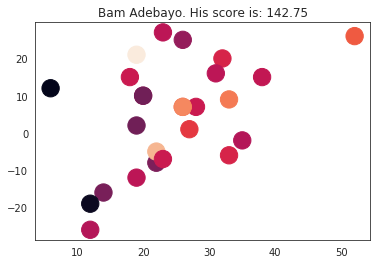

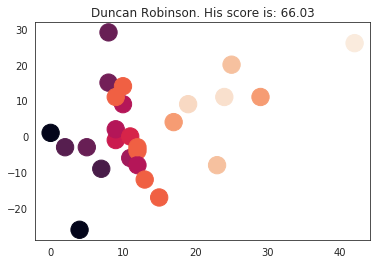

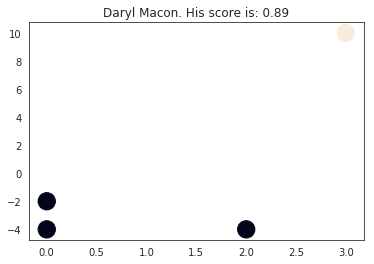

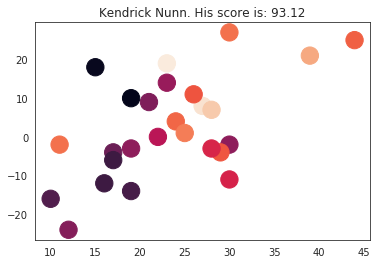

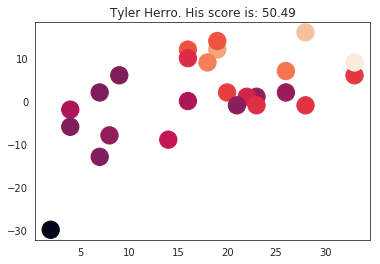

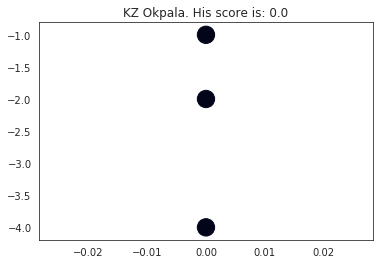

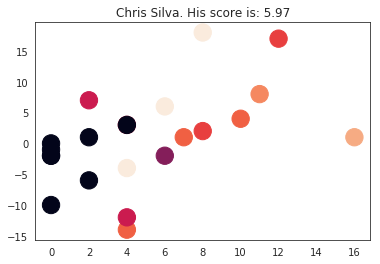

[248.74, 142.75, 115.86, 93.12, 66.03, 50.49, 37.63, 34.16, 31.04, 26.73, 14.19, 5.97, 0.89, 0.01, 0.0, -1.06]
Top 5 players on the MIA
0. Jimmy Butler has a stat win index score of: 248.74
1. Bam Adebayo has a stat win index score of: 142.75
2. Justise Winslow has a stat win index score of: 115.86
3. Kendrick Nunn has a stat win index score of: 93.12
4. Duncan Robinson has a stat win index score of: 66.03


In [203]:
get_winning_stats_per_team("MIA")

['Lou Williams' 'Patrick Beverley' 'Paul George' 'Patrick Patterson'
 'Kawhi Leonard' 'Maurice Harkless' 'JaMychal Green' 'Rodney McGruder'
 'Montrezl Harrell' 'Ivica Zubac' 'Johnathan Motley' 'Derrick Walton Jr.'
 'Jerome Robinson' 'Landry Shamet' 'Terance Mann' 'Mfiondu Kabengele']


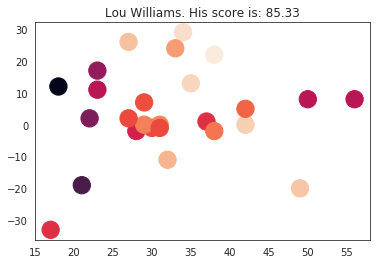

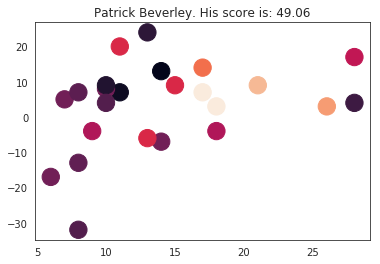

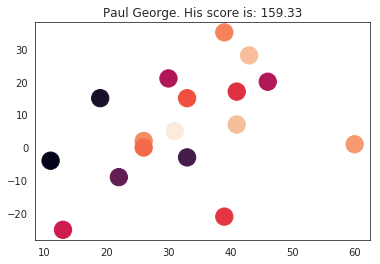

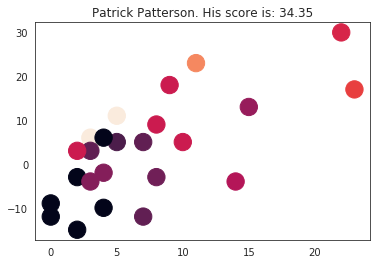

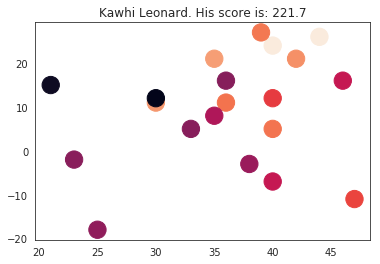

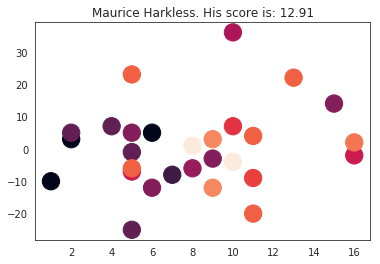

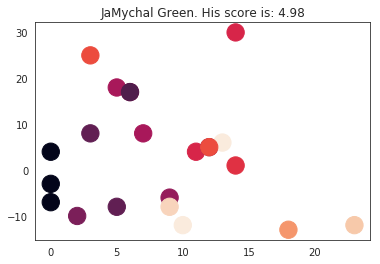

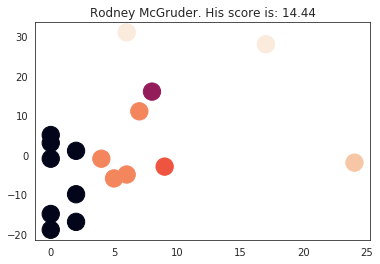

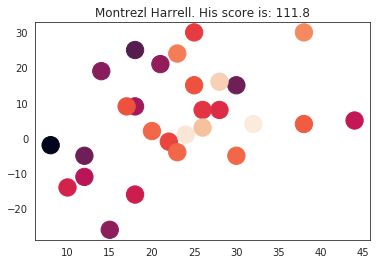

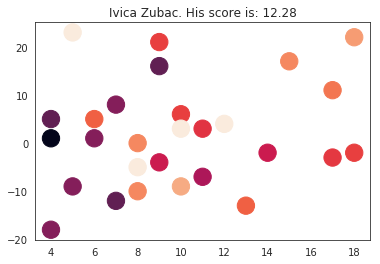

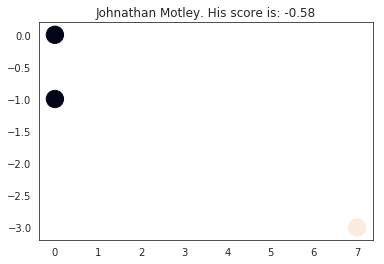

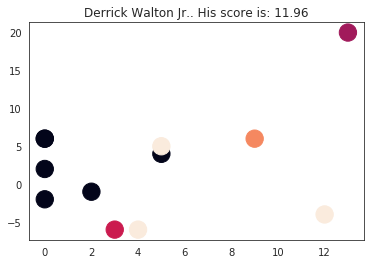

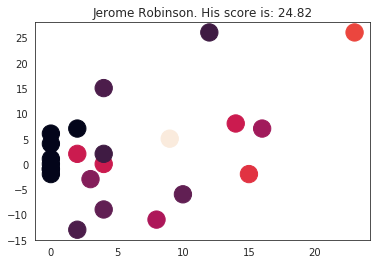

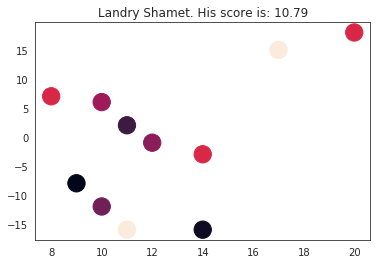

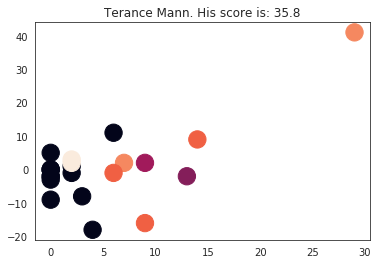

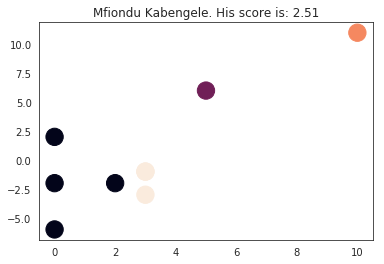

[221.7, 159.33, 111.8, 85.33, 49.06, 35.8, 34.35, 24.82, 14.44, 12.91, 12.28, 11.96, 10.79, 4.98, 2.51, -0.58]
Top 5 players on the LAC
0. Kawhi Leonard has a stat win index score of: 221.7
1. Paul George has a stat win index score of: 159.33
2. Montrezl Harrell has a stat win index score of: 111.8
3. Lou Williams has a stat win index score of: 85.33
4. Patrick Beverley has a stat win index score of: 49.06


In [204]:
get_winning_stats_per_team("LAC")

['Mike Conley' 'Jeff Green' 'Ed Davis' 'Bojan Bogdanovic' 'Rudy Gobert'
 'Dante Exum' 'Joe Ingles' 'Emmanuel Mudiay' "Royce O'Neale"
 'Georges Niang' 'Donovan Mitchell' 'Tony Bradley' 'Nigel Williams-Goss'
 'Miye Oni' 'Jarrell Brantley' 'Juwan Morgan']


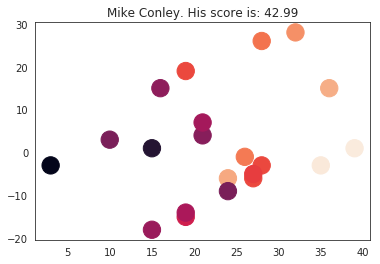

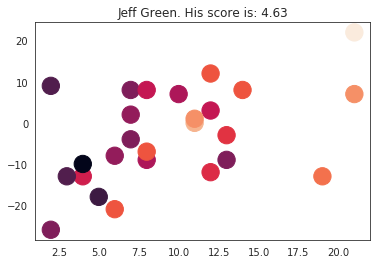

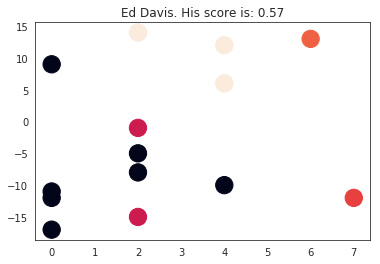

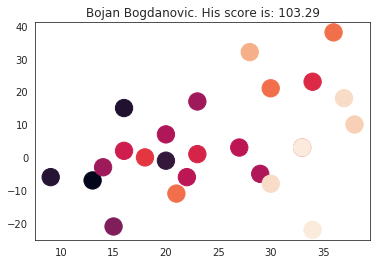

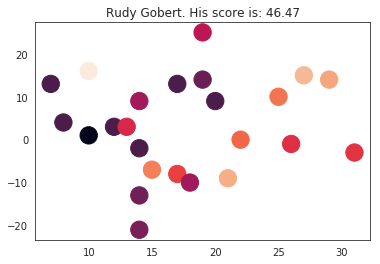

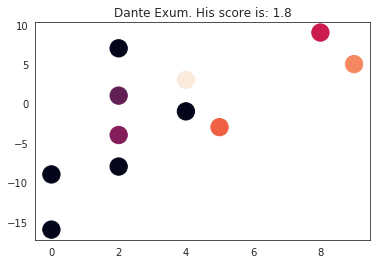

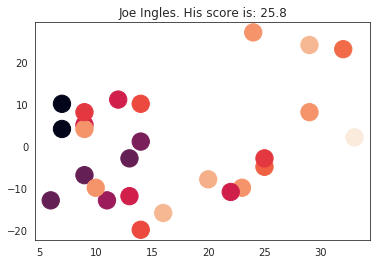

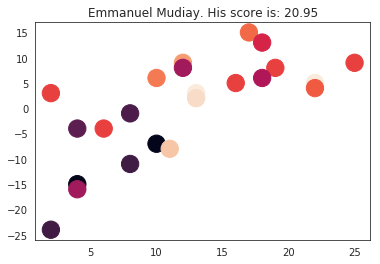

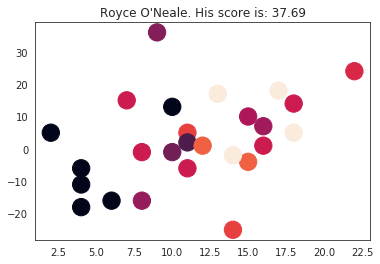

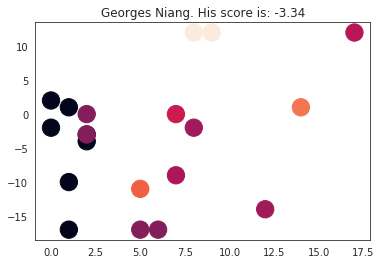

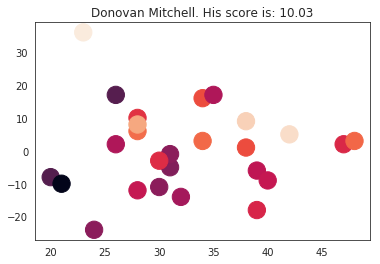

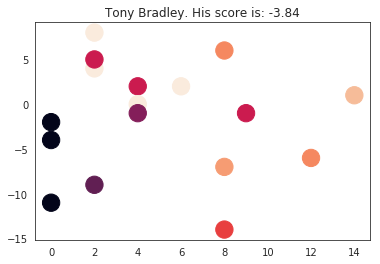

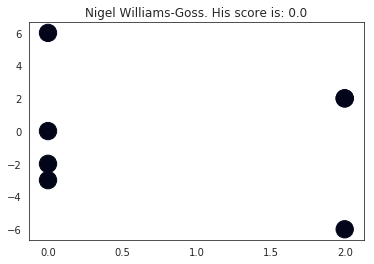

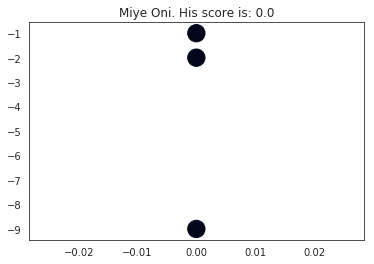

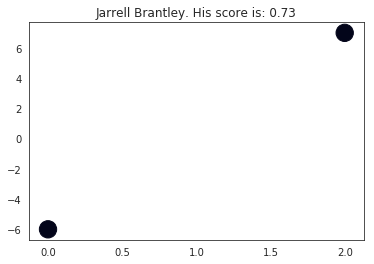

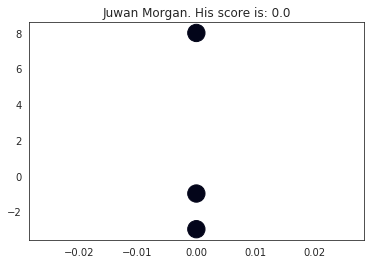

[103.29, 46.47, 42.99, 37.69, 25.8, 20.95, 10.03, 4.63, 1.8, 0.73, 0.57, 0.0, -3.34, -3.84]
Top 5 players on the UTA
0. Bojan Bogdanovic has a stat win index score of: 103.29
1. Rudy Gobert has a stat win index score of: 46.47
2. Mike Conley has a stat win index score of: 42.99
3. Royce O'Neale has a stat win index score of: 37.69
4. Joe Ingles has a stat win index score of: 25.8


In [192]:
get_winning_stats_per_team("UTA")

['Ricky Rubio' 'Aron Baynes' 'Dario Saric' 'Tyler Johnson'
 'Kelly Oubre Jr.' 'Frank Kaminsky' 'Devin Booker' 'Cheick Diallo'
 'Mikal Bridges' 'Jevon Carter' 'Deandre Ayton' 'Elie Okobo'
 'Jared Harper' 'Ty Jerome' 'Cameron Johnson']


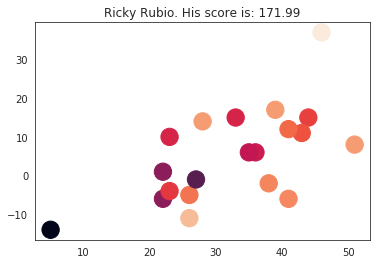

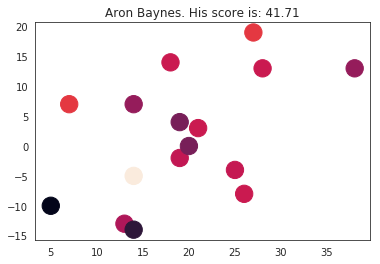

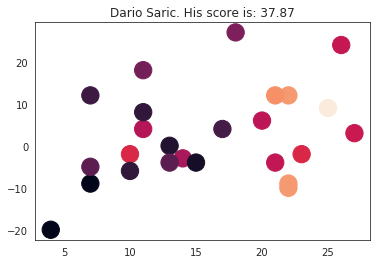

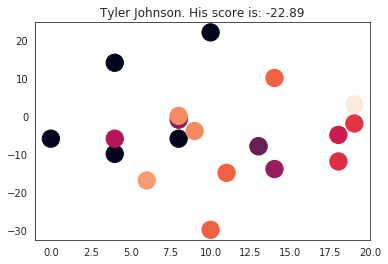

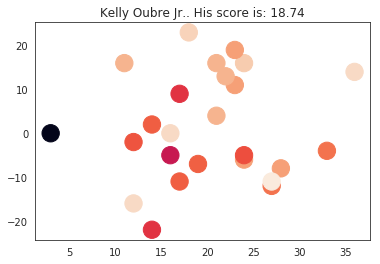

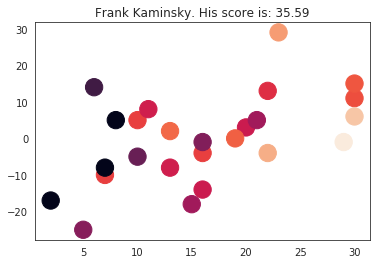

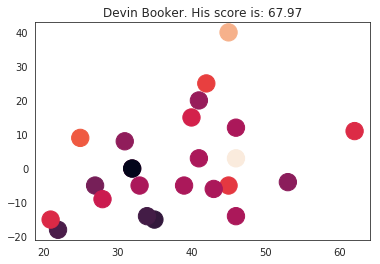

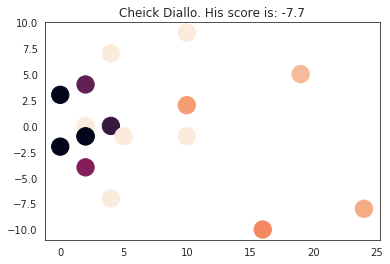

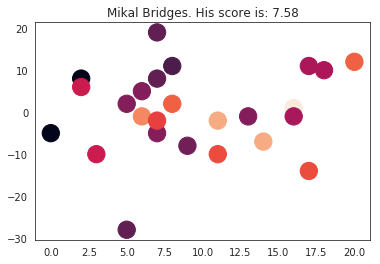

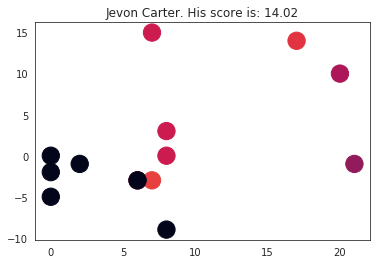

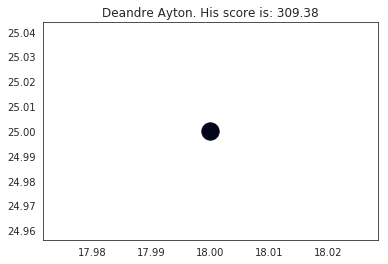

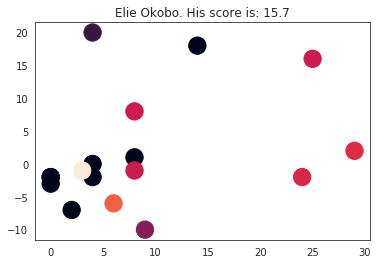

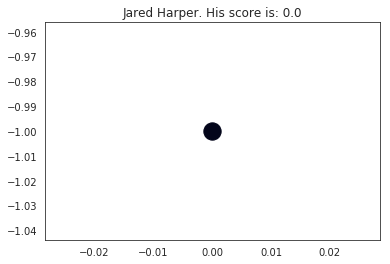

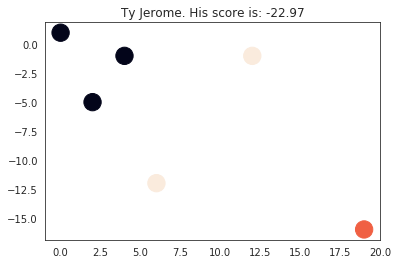

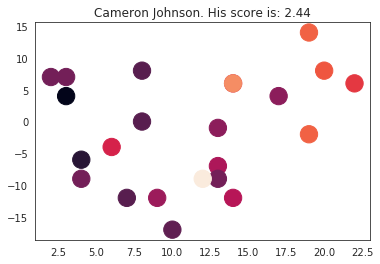

[309.38, 171.99, 67.97, 41.71, 37.87, 35.59, 18.74, 15.7, 14.02, 7.58, 2.44, 0.0, -7.7, -22.89, -22.97]
Top 5 players on the PHX
0. Deandre Ayton has a stat win index score of: 309.38
1. Ricky Rubio has a stat win index score of: 171.99
2. Devin Booker has a stat win index score of: 67.97
3. Aron Baynes has a stat win index score of: 41.71
4. Dario Saric has a stat win index score of: 37.87


In [193]:
get_winning_stats_per_team("PHX")

['Al Horford' 'Tobias Harris' 'Mike Scott' "Kyle O'Quinn" 'Trey Burke'
 'James Ennis III' 'Raul Neto' 'Norvel Pelle' 'Joel Embiid'
 'Josh Richardson' 'Ben Simmons' 'Furkan Korkmaz' 'Jonah Bolden'
 'Shake Milton' 'Zhaire Smith' 'Matisse Thybulle']


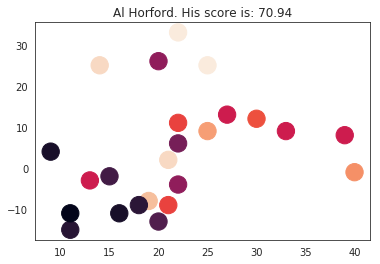

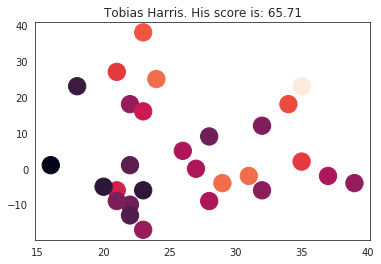

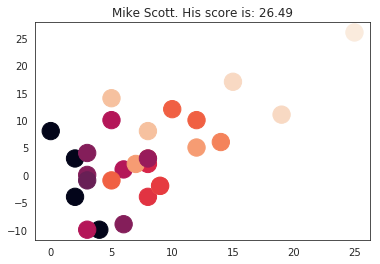

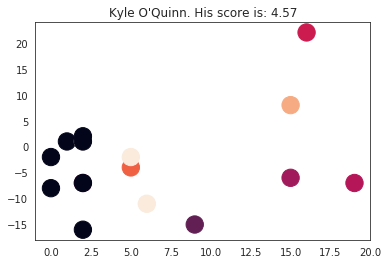

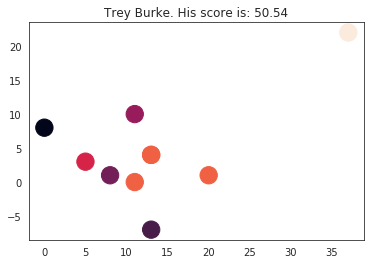

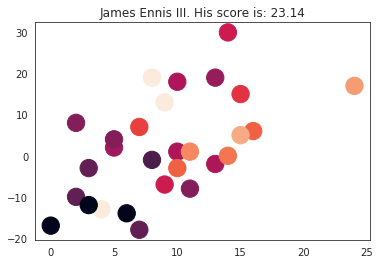

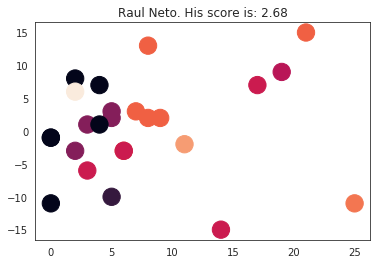

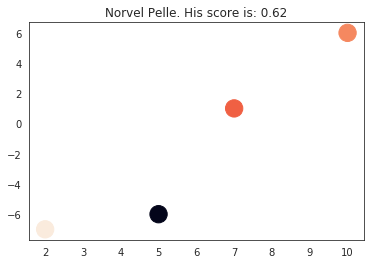

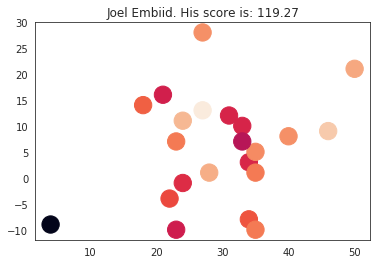

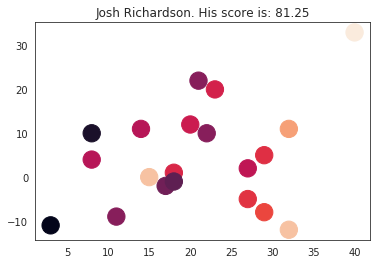

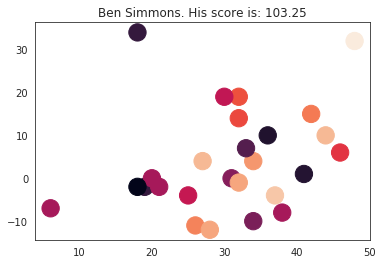

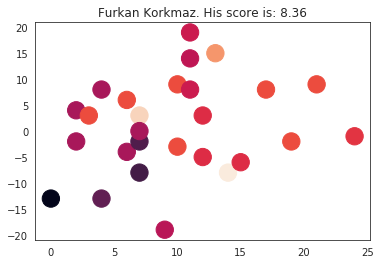

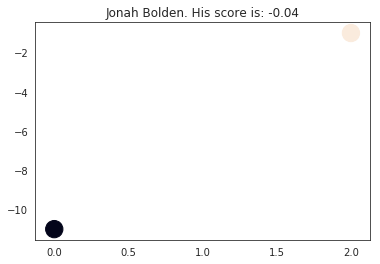

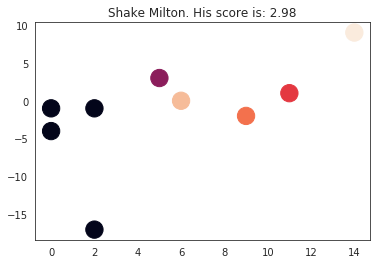

/home/vishnu/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


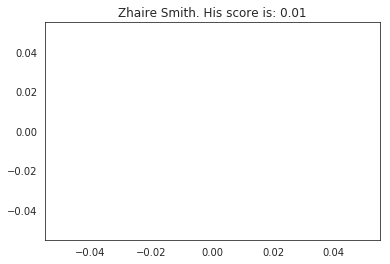

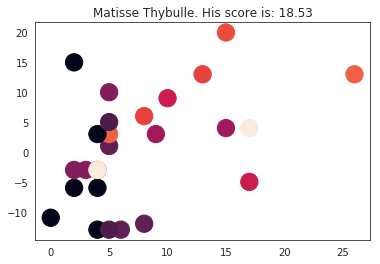

[119.27, 103.25, 81.25, 70.94, 65.71, 50.54, 26.49, 23.14, 18.53, 8.36, 4.57, 2.98, 2.68, 0.62, 0.01, -0.04]
Top 5 players on the PHI
0. Joel Embiid has a stat win index score of: 119.27
1. Ben Simmons has a stat win index score of: 103.25
2. Josh Richardson has a stat win index score of: 81.25
3. Al Horford has a stat win index score of: 70.94
4. Tobias Harris has a stat win index score of: 65.71


In [194]:
get_winning_stats_per_team("PHI")

['Kyle Korver' 'Ersan Ilyasova' 'Brook Lopez' 'Robin Lopez' 'George Hill'
 'Wesley Matthews' 'Eric Bledsoe' 'Khris Middleton'
 'Giannis Antetokounmpo' 'Thanasis Antetokounmpo']


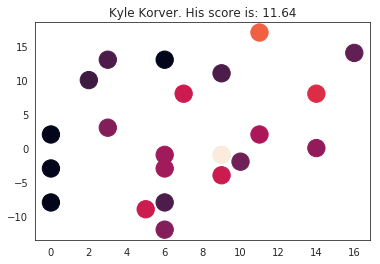

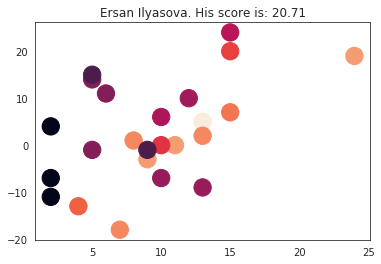

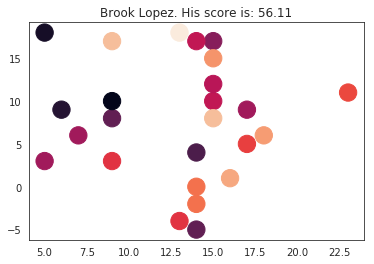

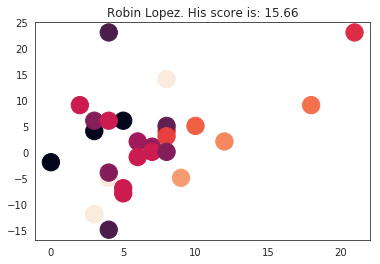

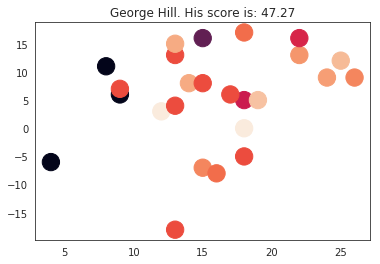

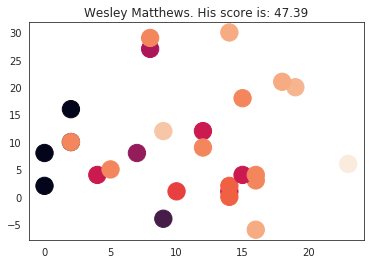

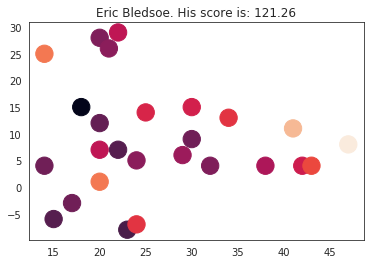

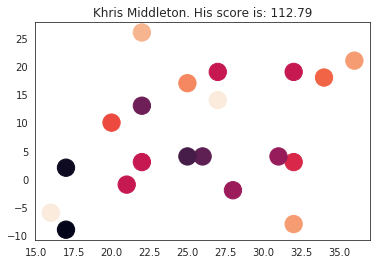

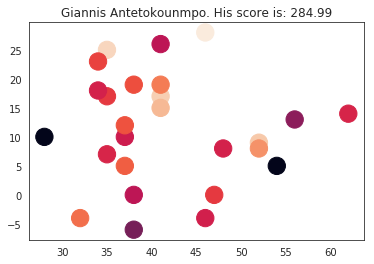

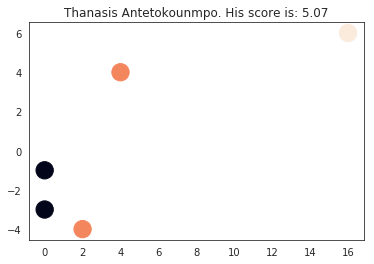

[284.99, 121.26, 112.79, 56.11, 47.39, 47.27, 20.71, 15.66, 11.64, 5.07]
Top 5 players on the MIL
0. Giannis Antetokounmpo has a stat win index score of: 284.99
1. Eric Bledsoe has a stat win index score of: 121.26
2. Khris Middleton has a stat win index score of: 112.79
3. Brook Lopez has a stat win index score of: 56.11
4. Wesley Matthews has a stat win index score of: 47.39


In [183]:
get_winning_stats_per_team("MIL")

['Carmelo Anthony' 'Anthony Tolliver' 'Hassan Whiteside' 'Damian Lillard'
 'Kent Bazemore' 'CJ McCollum' 'Rodney Hood' 'Jusuf Nurkic'
 'Mario Hezonja' 'Skal Labissiere' 'Zach Collins' 'Anfernee Simons'
 'Gary Trent Jr.' 'Nassir Little' 'Moses Brown' 'Jaylen Hoard']


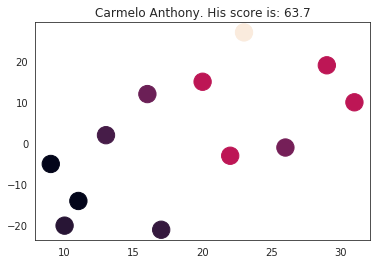

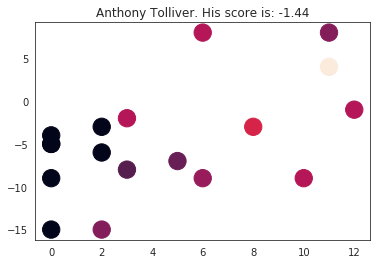

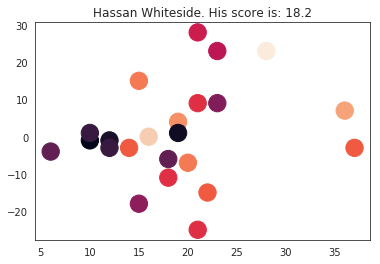

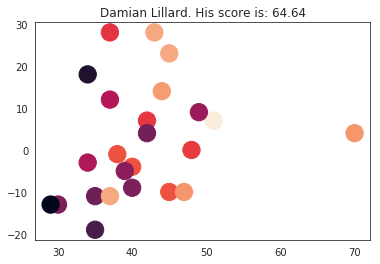

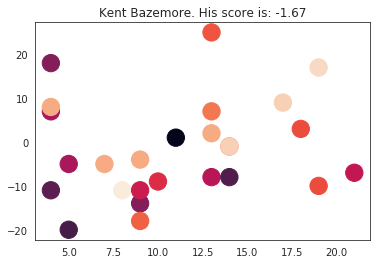

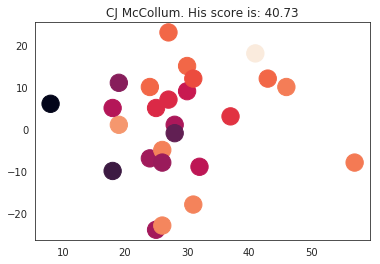

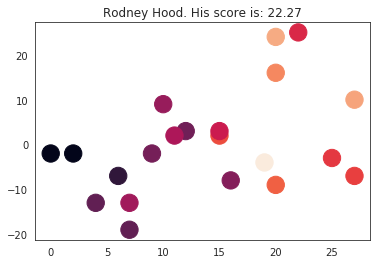

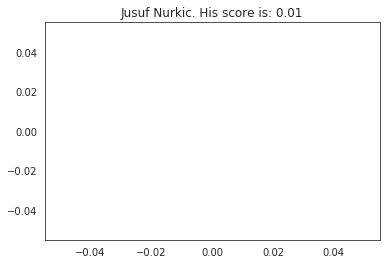

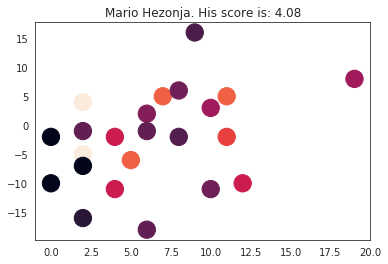

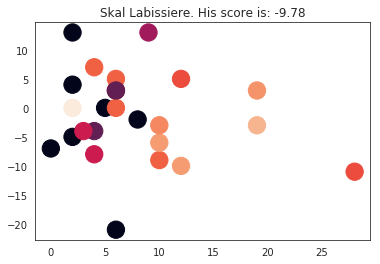

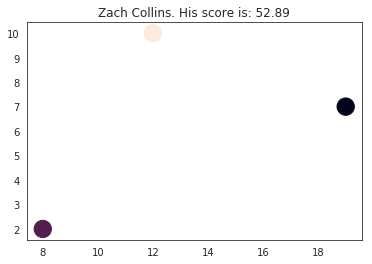

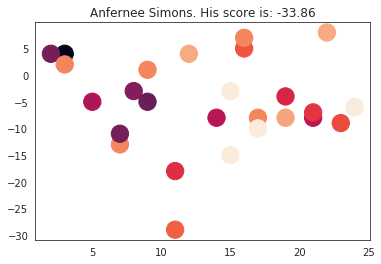

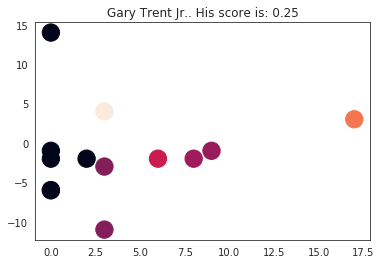

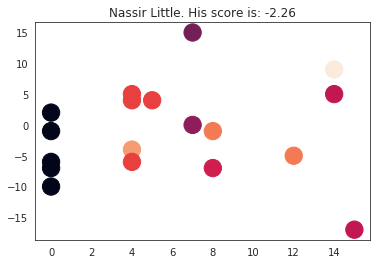

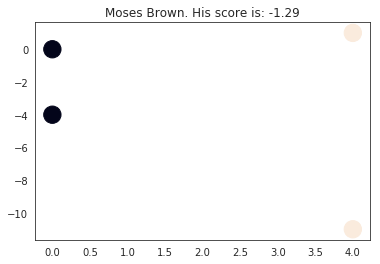

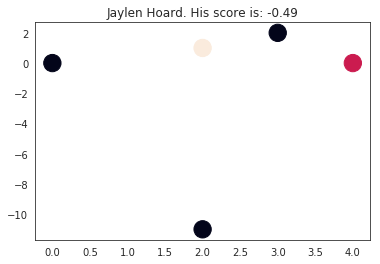

[64.64, 63.7, 52.89, 40.73, 22.27, 18.2, 4.08, 0.25, 0.01, -0.49, -1.29, -1.44, -1.67, -2.26, -9.78, -33.86]
Top 5 players on the POR
0. Damian Lillard has a stat win index score of: 64.64
1. Carmelo Anthony has a stat win index score of: 63.7
2. Zach Collins has a stat win index score of: 52.89
3. CJ McCollum has a stat win index score of: 40.73
4. Rodney Hood has a stat win index score of: 22.27


In [195]:
get_winning_stats_per_team("POR")

['Jeff Teague' 'Gorgui Dieng' 'Robert Covington' 'Shabazz Napier'
 'Noah Vonleh' 'Andrew Wiggins' 'Karl-Anthony Towns' 'Treveon Graham'
 'Jake Layman' 'Jordan Bell' 'Keita Bates-Diop' 'Josh Okogie'
 'Kelan Martin' 'Jordan McLaughlin' 'Jarrett Culver' 'Jaylen Nowell'
 'Naz Reid']


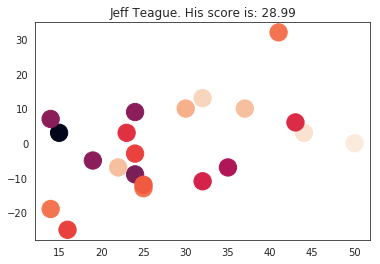

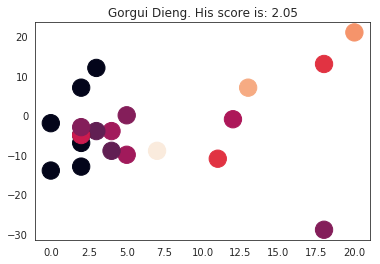

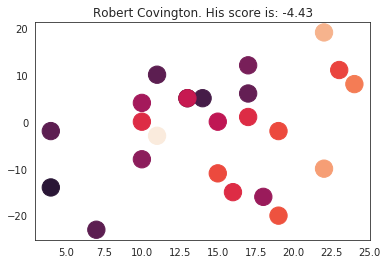

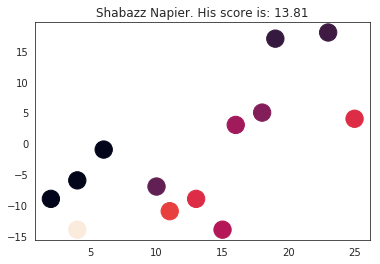

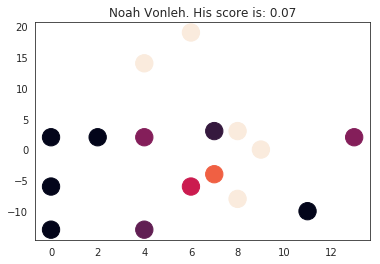

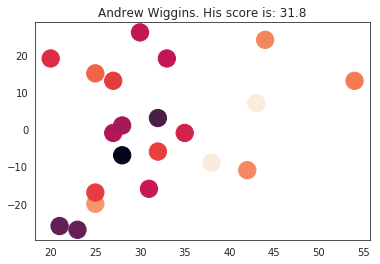

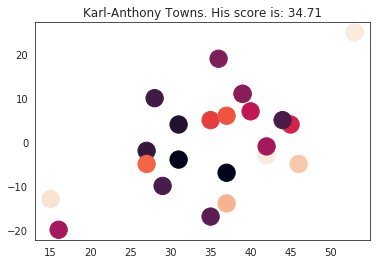

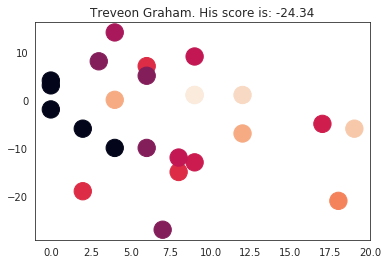

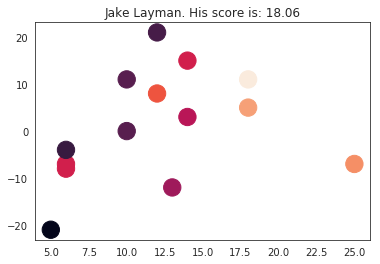

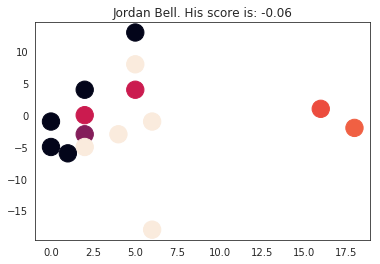

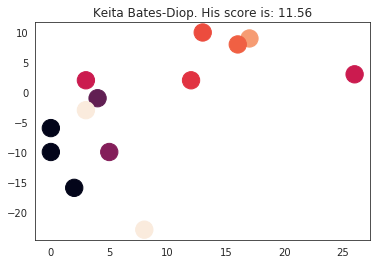

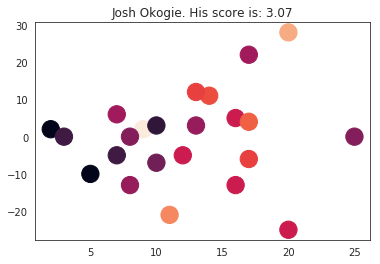

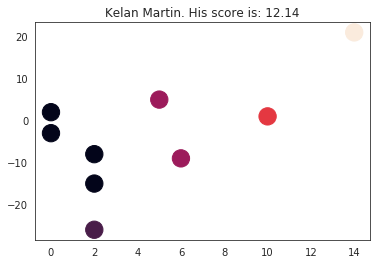

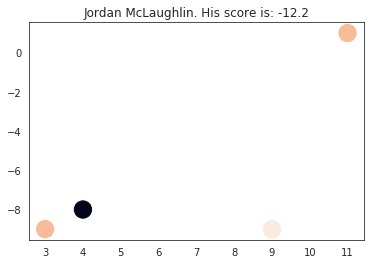

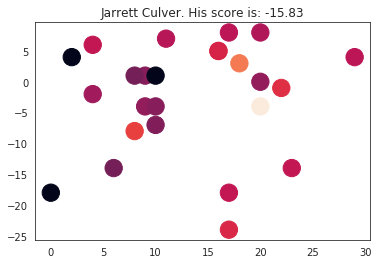

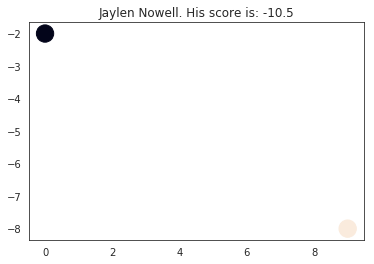

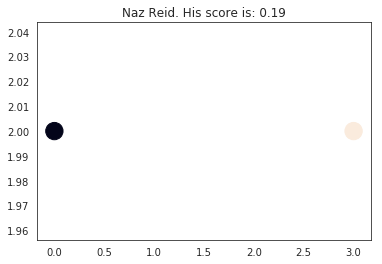

[34.71, 31.8, 28.99, 18.06, 13.81, 12.14, 11.56, 3.07, 2.05, 0.19, 0.07, -0.06, -4.43, -10.5, -12.2, -15.83, -24.34]
Top 5 players on the MIN
0. Karl-Anthony Towns has a stat win index score of: 34.71
1. Andrew Wiggins has a stat win index score of: 31.8
2. Jeff Teague has a stat win index score of: 28.99
3. Jake Layman has a stat win index score of: 18.06
4. Shabazz Napier has a stat win index score of: 13.81


In [196]:
get_winning_stats_per_team("MIN")

['Tyson Chandler' 'Nene' 'Gerald Green' 'Thabo Sefolosha' 'P.J. Tucker'
 'Russell Westbrook' 'Eric Gordon' 'James Harden' 'Austin Rivers'
 'Ben McLemore' 'Clint Capela' 'Danuel House Jr.' 'Isaiah Hartenstein'
 'Gary Clark' 'Chris Clemons']


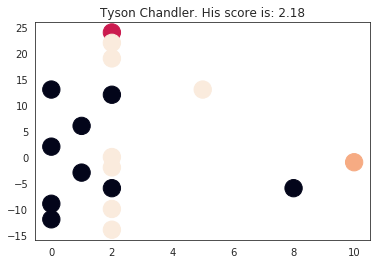

/home/vishnu/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


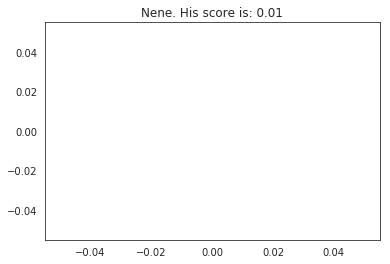

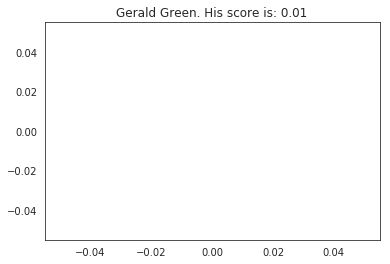

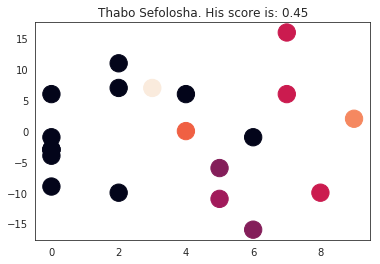

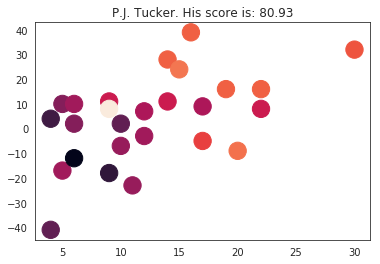

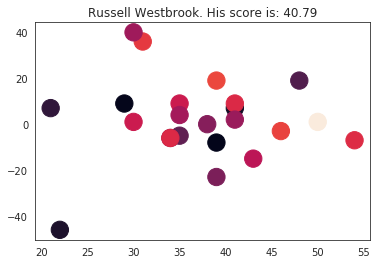

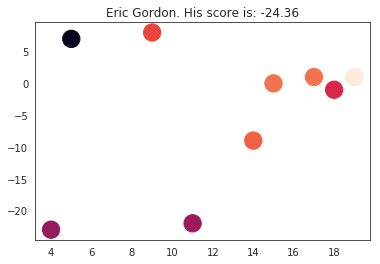

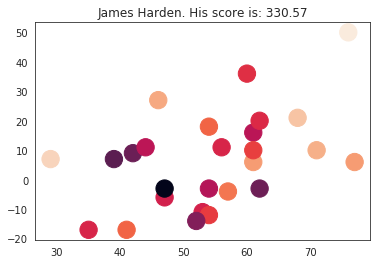

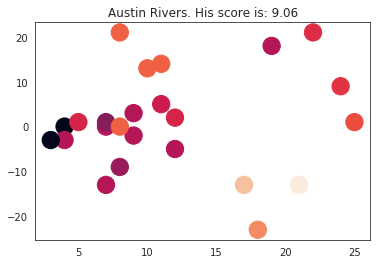

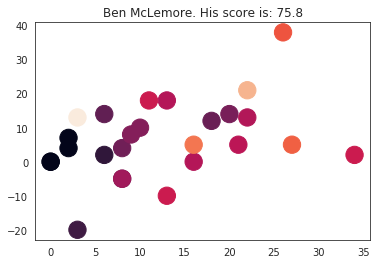

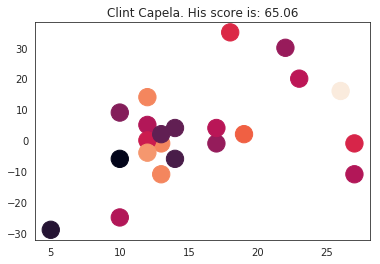

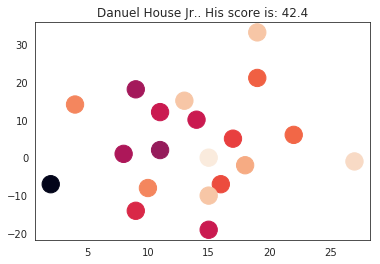

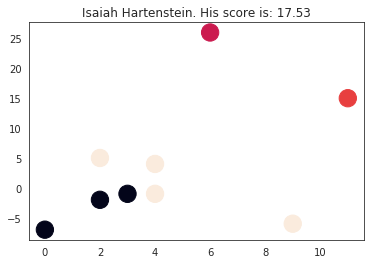

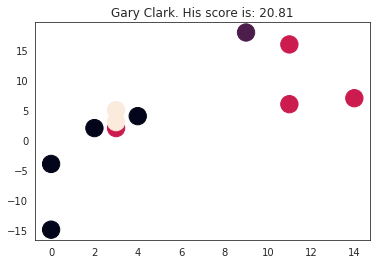

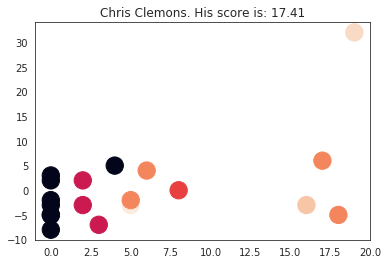

[330.57, 80.93, 75.8, 65.06, 42.4, 40.79, 20.81, 17.53, 17.41, 9.06, 2.18, 0.45, 0.01, -24.36]
Top 5 players on the HOU
0. James Harden has a stat win index score of: 330.57
1. P.J. Tucker has a stat win index score of: 80.93
2. Ben McLemore has a stat win index score of: 75.8
3. Clint Capela has a stat win index score of: 65.06
4. Danuel House Jr. has a stat win index score of: 42.4


In [197]:
get_winning_stats_per_team("HOU")

['Paul Millsap' 'Will Barton' 'Mason Plumlee' 'Gary Harris' 'Jerami Grant'
 'Nikola Jokic' 'Malik Beasley' 'Jamal Murray' 'Juancho Hernangomez'
 'Monte Morris' 'Vlatko Cancar' 'Torrey Craig' 'Michael Porter Jr.'
 'Jarred Vanderbilt']


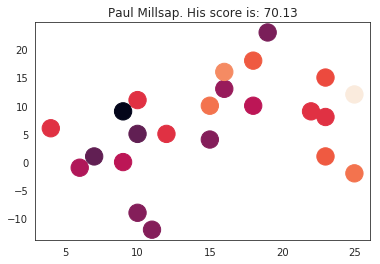

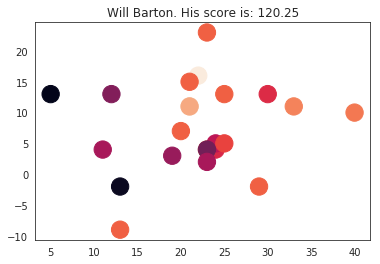

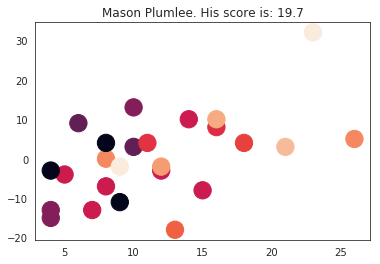

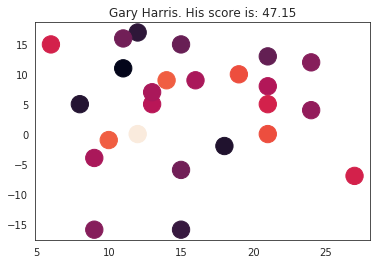

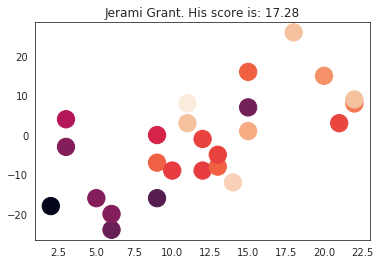

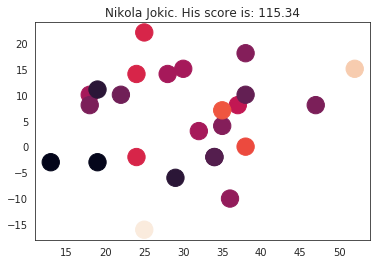

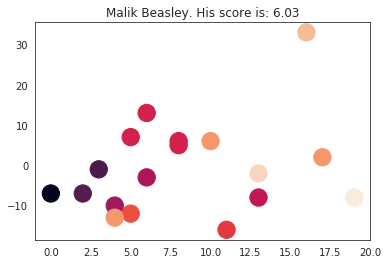

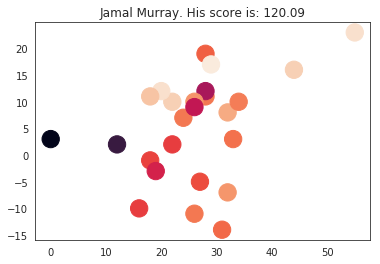

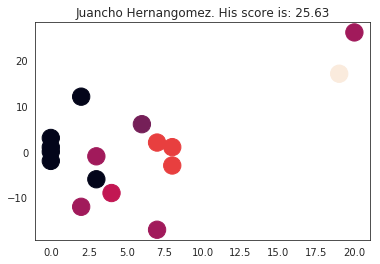

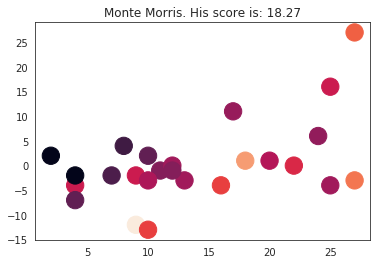

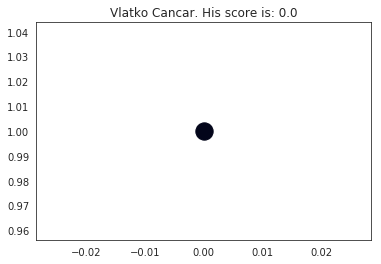

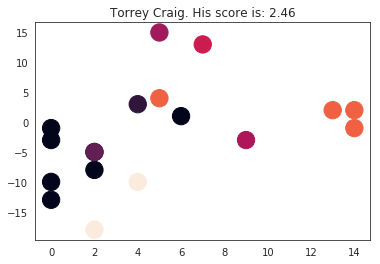

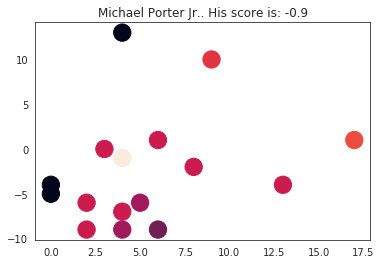

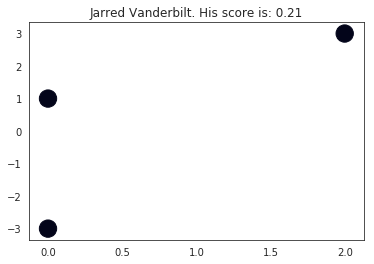

[120.25, 120.09, 115.34, 70.13, 47.15, 25.63, 19.7, 18.27, 17.28, 6.03, 2.46, 0.21, 0.0, -0.9]
Top 5 players on the DEN
0. Will Barton has a stat win index score of: 120.25
1. Jamal Murray has a stat win index score of: 120.09
2. Nikola Jokic has a stat win index score of: 115.34
3. Paul Millsap has a stat win index score of: 70.13
4. Gary Harris has a stat win index score of: 47.15


In [198]:
get_winning_stats_per_team("DEN")

['Gordon Hayward' 'Enes Kanter' 'Kemba Walker' 'Brad Wanamaker'
 'Marcus Smart' 'Jaylen Brown' 'Jayson Tatum' 'Semi Ojeleye'
 'Daniel Theis' 'Carsen Edwards' 'Robert Williams III' 'Tacko Fall'
 'Romeo Langford' 'Tremont Waters' 'Grant Williams' 'Vincent Poirier'
 'Javonte Green']


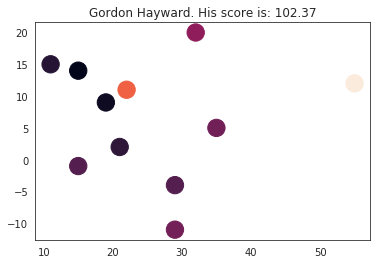

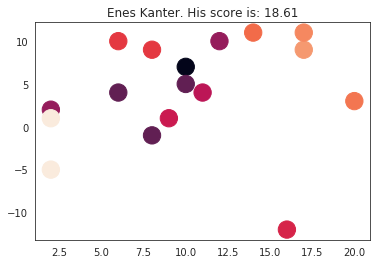

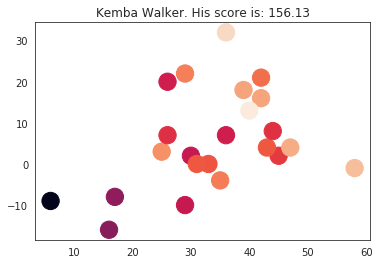

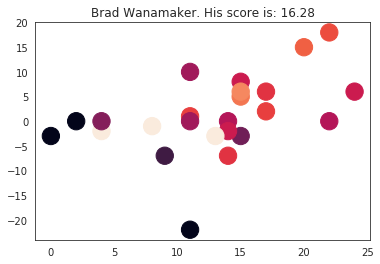

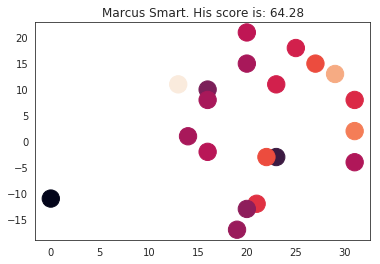

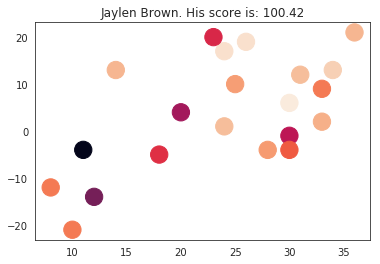

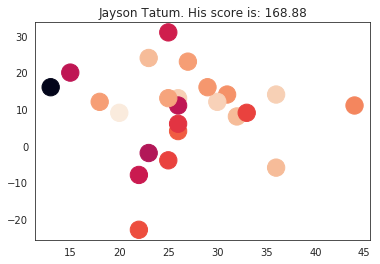

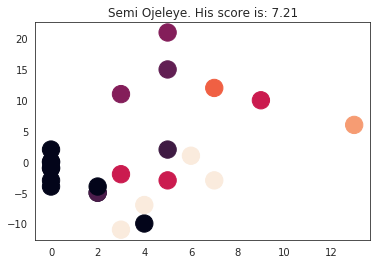

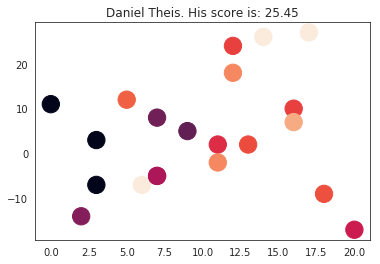

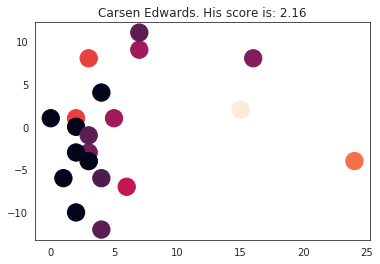

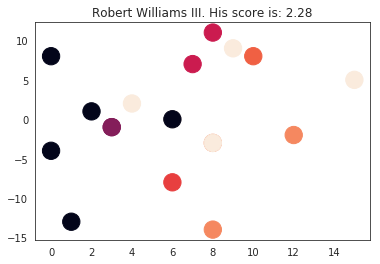

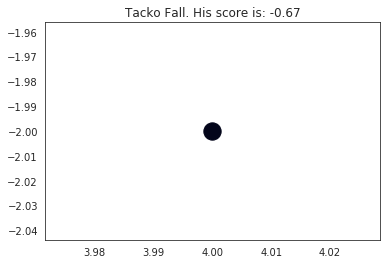

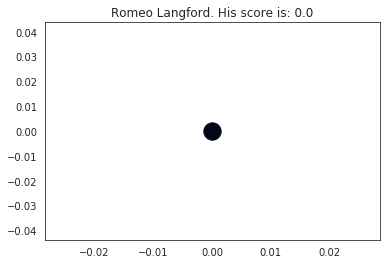

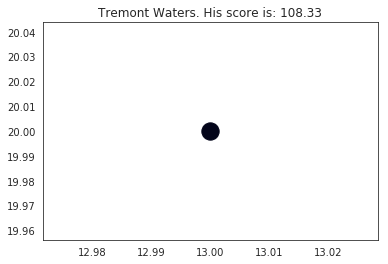

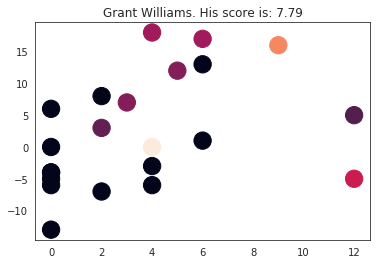

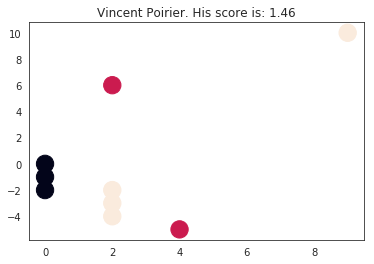

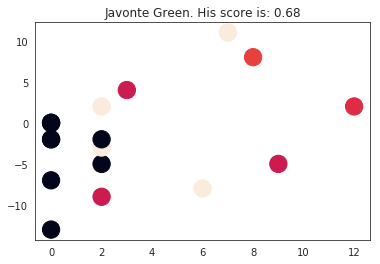

[168.88, 156.13, 108.33, 102.37, 100.42, 64.28, 25.45, 18.61, 16.28, 7.79, 7.21, 2.28, 2.16, 1.46, 0.68, 0.0, -0.67]
Top 5 players on the BOS
0. Jayson Tatum has a stat win index score of: 168.88
1. Kemba Walker has a stat win index score of: 156.13
2. Tremont Waters has a stat win index score of: 108.33
3. Gordon Hayward has a stat win index score of: 102.37
4. Jaylen Brown has a stat win index score of: 100.42


In [199]:
get_winning_stats_per_team("BOS")

['Kyle Lowry' 'Marc Gasol' 'Serge Ibaka' 'Stanley Johnson'
 'Rondae Hollis-Jefferson' 'Norman Powell' 'Malcolm Miller'
 'Patrick McCaw' 'Pascal Siakam' 'Fred VanVleet' 'OG Anunoby'
 'Chris Boucher' 'Shamorie Ponds' 'Oshae Brissett' 'Terence Davis'
 'Dewan Hernandez' 'Matt Thomas']


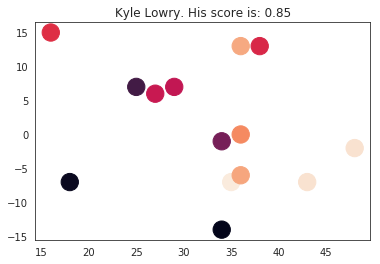

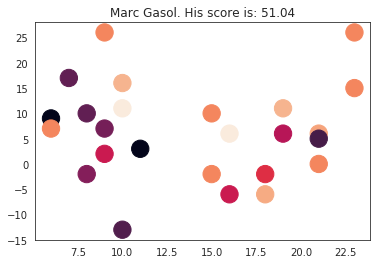

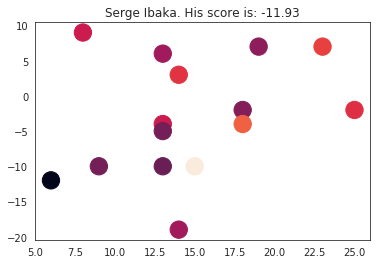

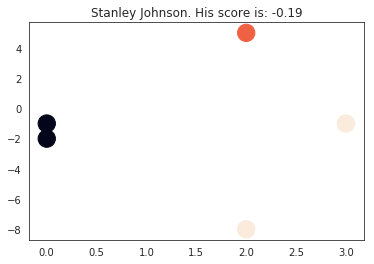

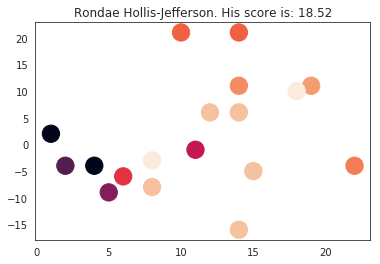

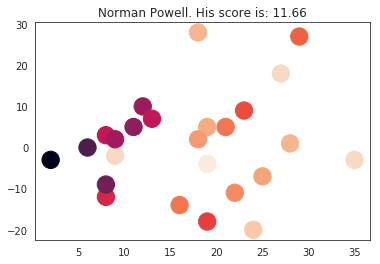

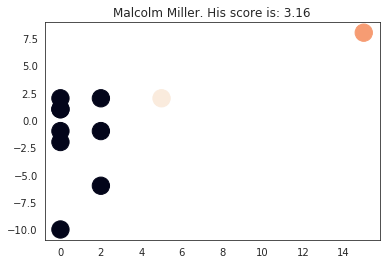

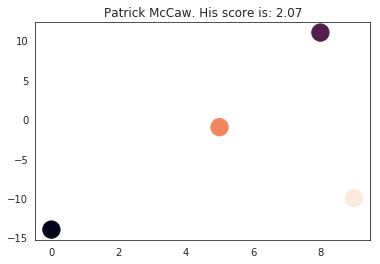

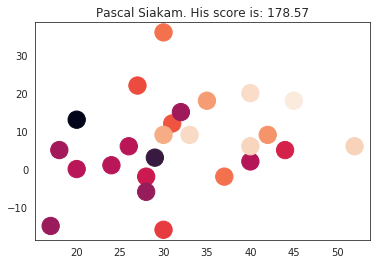

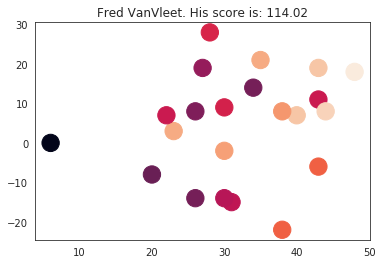

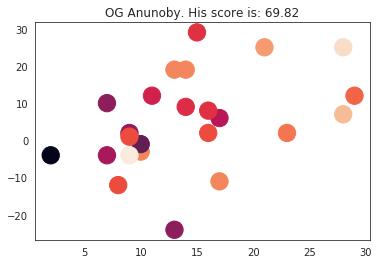

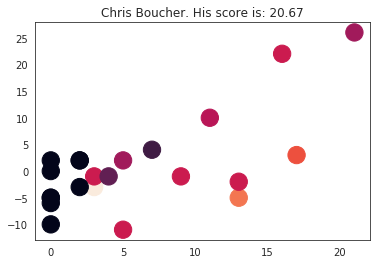

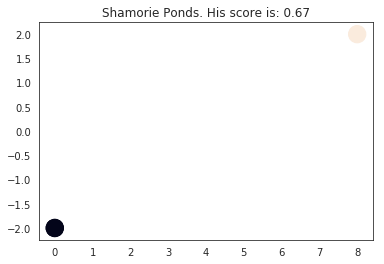

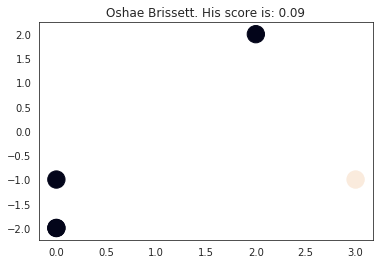

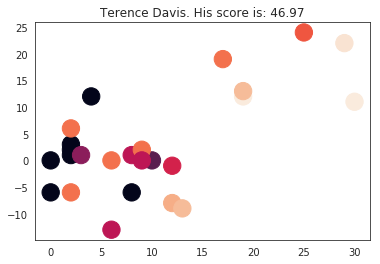

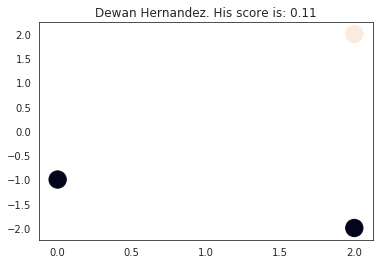

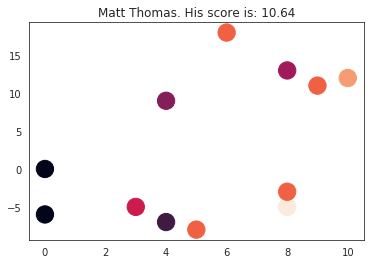

[178.57, 114.02, 69.82, 51.04, 46.97, 20.67, 18.52, 11.66, 10.64, 3.16, 2.07, 0.85, 0.67, 0.11, 0.09, -0.19, -11.93]
Top 5 players on the TOR
0. Pascal Siakam has a stat win index score of: 178.57
1. Fred VanVleet has a stat win index score of: 114.02
2. OG Anunoby has a stat win index score of: 69.82
3. Marc Gasol has a stat win index score of: 51.04
4. Terence Davis has a stat win index score of: 46.97


In [200]:
get_winning_stats_per_team("TOR")

['Chris Paul' 'Danilo Gallinari' 'Nerlens Noel' 'Andre Roberson'
 'Dennis Schroder' 'Mike Muscala' 'Steven Adams' 'Abdel Nader'
 'Justin Patton' 'Terrance Ferguson' 'Hamidou Diallo'
 'Shai Gilgeous-Alexander' 'Deonte Burton' 'Darius Bazley' 'Luguentz Dort']


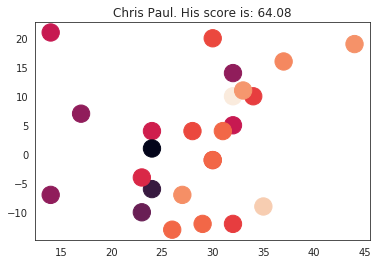

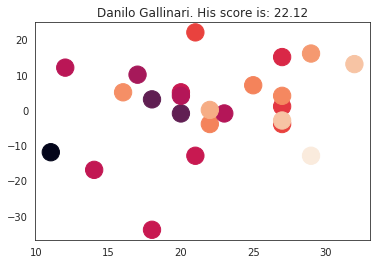

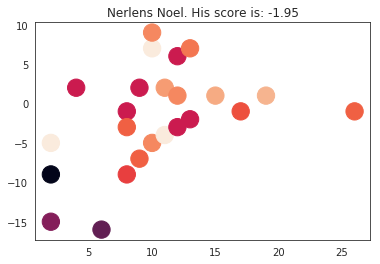

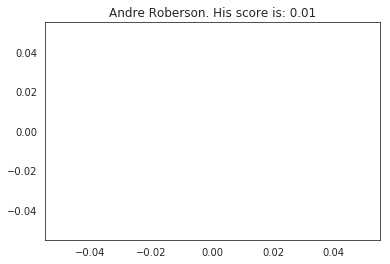

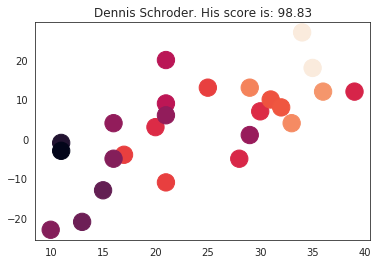

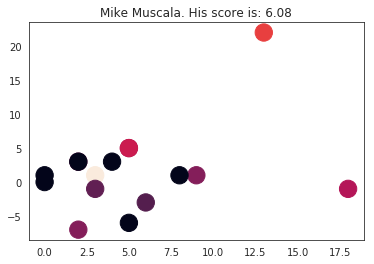

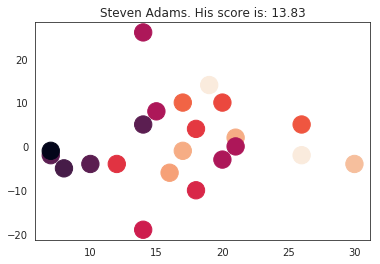

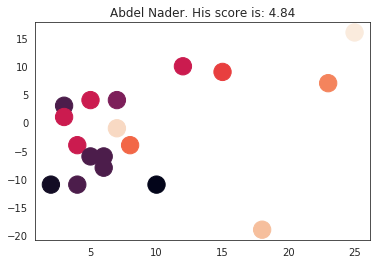

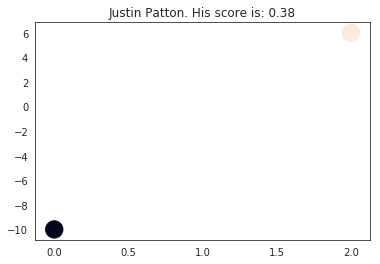

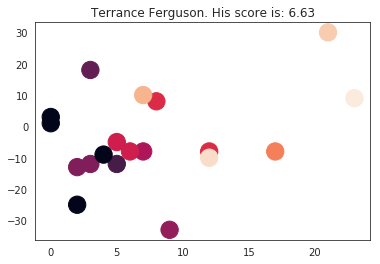

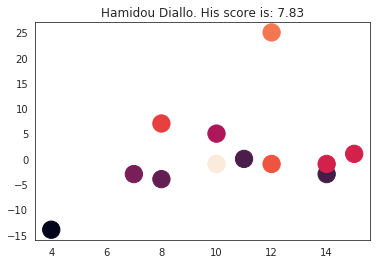

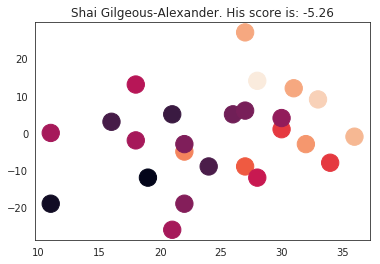

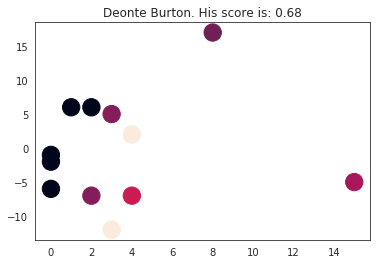

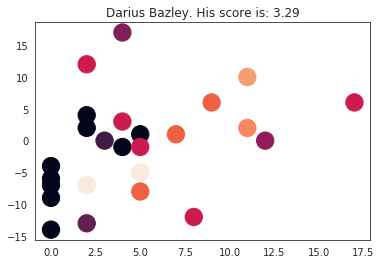

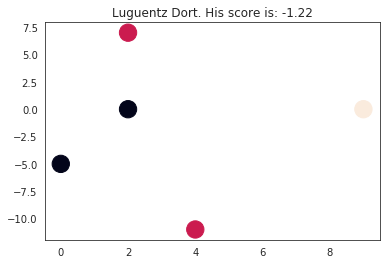

[98.83, 64.08, 22.12, 13.83, 7.83, 6.63, 6.08, 4.84, 3.29, 0.68, 0.38, 0.01, -1.22, -1.95, -5.26]
Top 5 players on the OKC
0. Dennis Schroder has a stat win index score of: 98.83
1. Chris Paul has a stat win index score of: 64.08
2. Danilo Gallinari has a stat win index score of: 22.12
3. Steven Adams has a stat win index score of: 13.83
4. Hamidou Diallo has a stat win index score of: 7.83


In [201]:
get_winning_stats_per_team("OKC")

['J.J. Barea' 'Courtney Lee' 'Tim Hardaway Jr.' 'Seth Curry'
 'Dwight Powell' 'Kristaps Porzingis' 'Delon Wright' 'Boban Marjanovic'
 'Dorian Finney-Smith' 'Justin Jackson' 'Maxi Kleber' 'Antonius Cleveland'
 'Jalen Brunson' 'Luka Doncic' 'Ryan Broekhoff']


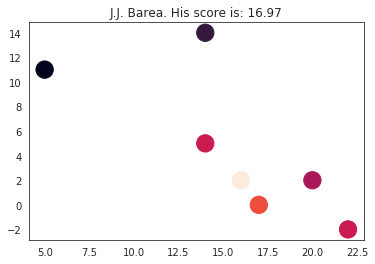

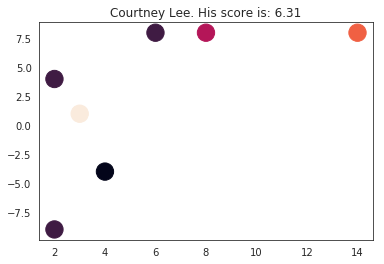

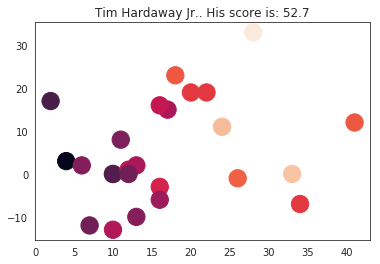

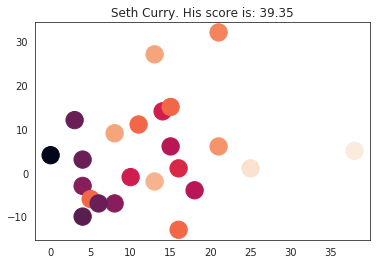

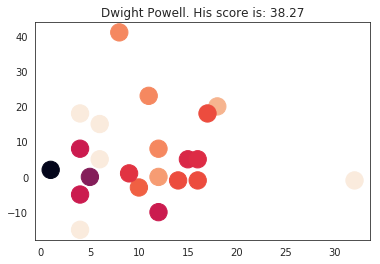

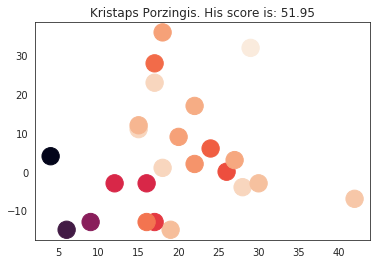

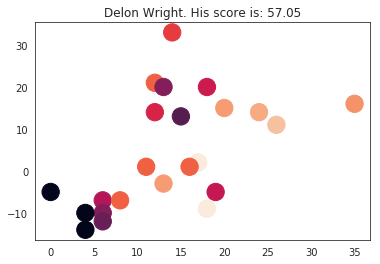

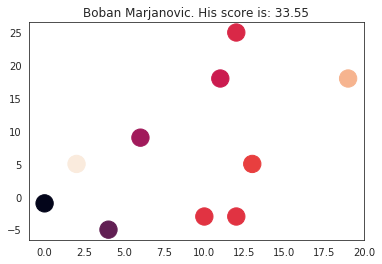

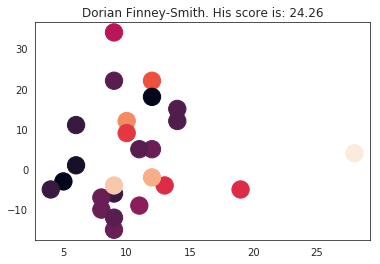

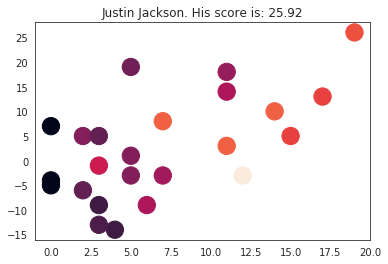

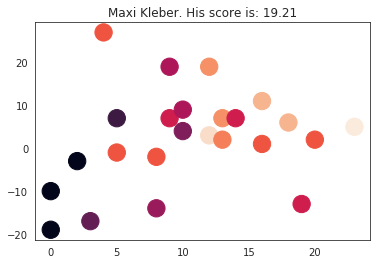

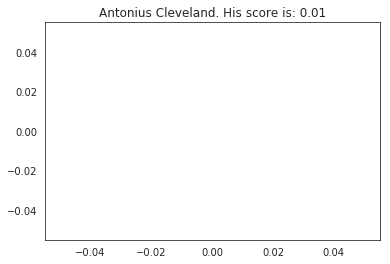

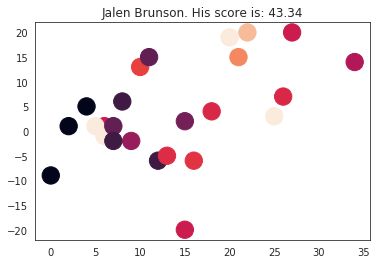

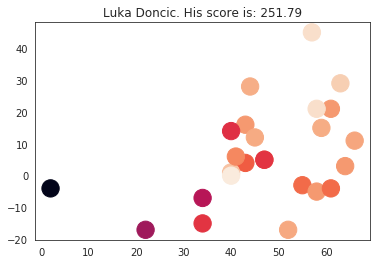

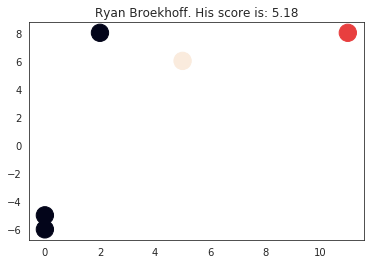

[251.79, 57.05, 52.7, 51.95, 43.34, 39.35, 38.27, 33.55, 25.92, 24.26, 19.21, 16.97, 6.31, 5.18, 0.01]
Top 5 players on the DAL
0. Luka Doncic has a stat win index score of: 251.79
1. Delon Wright has a stat win index score of: 57.05
2. Tim Hardaway Jr. has a stat win index score of: 52.7
3. Kristaps Porzingis has a stat win index score of: 51.95
4. Jalen Brunson has a stat win index score of: 43.34


In [202]:
get_winning_stats_per_team("DAL")